In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [22]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Define data path
data_dir = Path("Data")
train_path = data_dir / "train.tsv"
test_path = data_dir / "test.tsv"
val_path = data_dir / "valid.tsv"

columns = ["id", "label", "statement", "subject", "speaker", "speaker_job", "state", "party_affiliation", "barely_true_count", "false_count", "half_true_count", "mostly_true_count", "pants_on_fire_count", "context"]

# Read the TSV files
df_train = pd.read_csv(train_path, sep='\t', header=None, names=columns)
df_test = pd.read_csv(test_path, sep='\t', header=None, names=columns)
df_val = pd.read_csv(val_path, sep='\t', header=None, names=columns)

# Combine datasets into one
df = pd.concat([df_train, df_test, df_val], ignore_index=True)

# Explore data structure
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (12791, 14)


,id,label,statement,subject,speaker,speaker_job,state,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [23]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                        0
label                     0
statement                 0
subject                   2
speaker                   2
speaker_job            3568
state                  2751
party_affiliation         2
barely_true_count         2
false_count               2
half_true_count           2
mostly_true_count         2
pants_on_fire_count       2
context                 131
dtype: int64


In [24]:
# Drop rows with missing statements (as statement is critical for NLP analysis)
df.dropna(subset=["statement"], inplace=True)

In [25]:
# Fill missing categorical values with 'Unknown'
categorical_columns = ["subject", "speaker", "speaker_job", "state", "party_affiliation", "context"]
for col in categorical_columns:
    df[col].fillna("Unknown", inplace=True)

C:\Users\agmil\AppData\Local\Temp\ipykernel_21780\3341876759.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [26]:
# Convert labels to a simplified binary classification
label_map = {
    "true": 1, "mostly-true": 1, "half-true": 1,
    "barely-true": 0, "false": 0, "pants-fire": 0
}
df["binary_label"] = df["label"].map(label_map)

In [27]:
# Drop unnecessary columns (id is not useful for ML)
df.drop(columns=["id"], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Summary of the cleaned dataset
print("\nCleaned Dataset Shape:", df.shape)
df.head()


Cleaned Dataset Shape: (12790, 14)


,label,statement,subject,speaker,speaker_job,state,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context,binary_label
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,Unknown,Unknown,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1


In [28]:
# Save cleaned dataset
df.to_csv("liar_cleaned.csv", index=False)
print("\nCleaned data saved as liar_cleaned.csv")


Cleaned data saved as liar_cleaned.csv


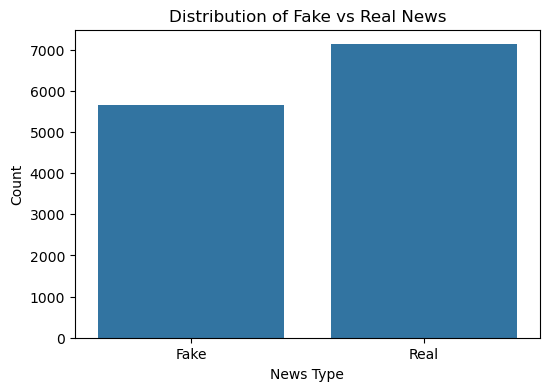

In [29]:
# Quick visualization of label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['binary_label'])
plt.title("Distribution of Fake vs Real News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.show()